Decision Tree Accuracy: 98.52%

Decision Tree Confusion Matrix:
 [[ 943    0    1    3    3    6    2]
 [   1  108    0    0    1    1    0]
 [   4    0 1009    2    5    0    4]
 [   4    0    6 1751    7    2    4]
 [   3    0    4    3 1216    6    1]
 [   5    0    7    6    2 1225    2]
 [   3    0    2    4    1    1  820]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

       angry       0.98      0.98      0.98       958
     disgust       1.00      0.97      0.99       111
        fear       0.98      0.99      0.98      1024
       happy       0.99      0.99      0.99      1774
     neutral       0.98      0.99      0.99      1233
         sad       0.99      0.98      0.98      1247
    surprise       0.98      0.99      0.99       831

    accuracy                           0.99      7178
   macro avg       0.99      0.98      0.99      7178
weighted avg       0.99      0.99      0.99      7178



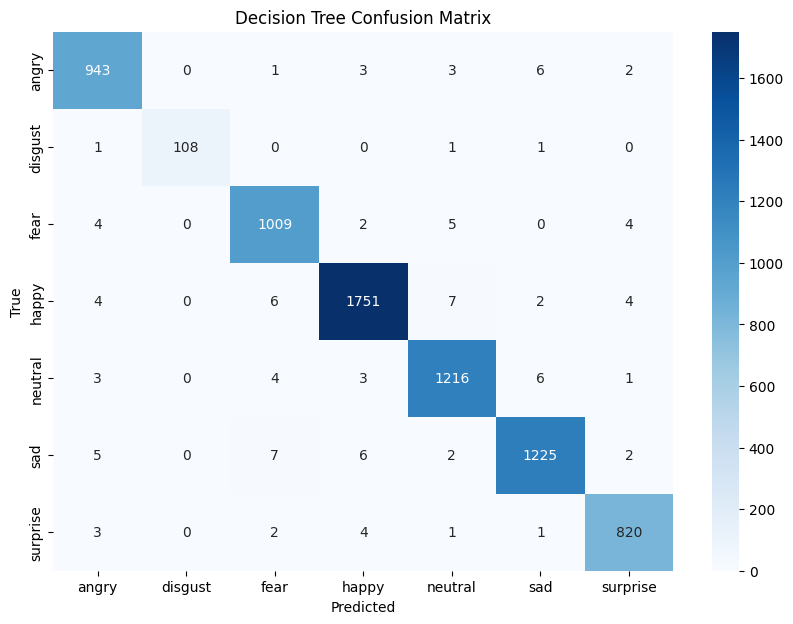

The predicted emotion using Decision Tree for the uploaded image is: neutral


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from skimage.feature import hog
from tqdm import tqdm

# Function to load and extract HOG features from images
def load_images_with_hog(folder):
    hog_features = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is not None:
                img = cv2.resize(img, (48, 48))  # Resize to 48x48 pixels
                # Extract HOG features
                features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
                hog_features.append(features)
                labels.append(label)
    return np.array(hog_features), labels

# Load train and test sets
train_dir = '/content/train'  # Change this to your dataset path
val_dir = '/content/test'     # Change this to your dataset path
X_train, y_train = load_images_with_hog(train_dir)
X_test, y_test = load_images_with_hog(val_dir)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded)
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Generate confusion matrix and classification report for Decision Tree
cm_dt = confusion_matrix(y_test_encoded, y_pred_dt)
report_dt = classification_report(y_test_encoded, y_pred_dt, target_names=label_encoder.classes_, zero_division=1)
print("\nDecision Tree Confusion Matrix:\n", cm_dt)
print("\nDecision Tree Classification Report:\n", report_dt)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Function to predict emotion for a single image using the Decision Tree model
def predict_emotion_with_hog(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is not None:
        img = cv2.resize(img, (48, 48))
        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False).reshape(1, -1)  # Extract HOG features
        predicted_label_encoded = model.predict(features)
        predicted_emotion = label_encoder.inverse_transform(predicted_label_encoded)
        return predicted_emotion[0]
    else:
        return "Image not found or unable to load"

# Example usage: Predict the emotion of a new uploaded image using Decision Tree
uploaded_image_path = '/content/test/neutral/PrivateTest_11164800.jpg'  # Change this to the path of the uploaded image
predicted_emotion_dt = predict_emotion_with_hog(uploaded_image_path, dt_model)
print(f'The predicted emotion using Decision Tree for the uploaded image is: {predicted_emotion_dt}')
